In [0]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input/templist2/")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

[1] "00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv"
 [2] "0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv"
 [3] "0E6184E1-90C0-48EE-B25A-F1ECB7B9714E.features_labels.csv"
 [4] "11B5EC4D-4133-4289-B475-4E737182A406.features_labels.csv"
 [5] "1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842.features_labels.csv"
 [6] "24E40C4C-A349-4F9F-93AB-01D00FB994AF.features_labels.csv"
 [7] "27E04243-B138-4F40-A164-F40B60165CF3.features_labels.csv"
 [8] "33A85C34-CFE4-4732-9E73-0A7AC861B27A.features_labels.csv"
 [9] "4E98F91F-4654-42EF-B908-A3389443F2E7.features_labels.csv"
[10] "4FC32141-E888-4BFF-8804-12559A491D8C.features_labels.csv"
[11] "5EF64122-B513-46AE-BCF1-E62AAC285D2C.features_labels.csv"
[12] "7CE37510-56D0-4120-A1CF-0E23351428D2.features_labels.csv"
[13] "9DC38D04-E82E-4F29-AB52-B476535226F2.features_labels.csv"

In [0]:
install.packages('gmodels')
install.packages('caret')
install.packages('e1071')
install.packages('ROCR')
install.packages('mice')
install.packages('anytime')
install.packages('tidyverse')
install.packages('reshape2')
install.packages('rattle')

install.packages('partykit')
install.packages('rpart')

install.packages('moments')
install.packages('mlbench')
install.packages('scales')
install.packages('cluster')
install.packages('pvclust')

install.packages('randomForest')
install.packages("devtools")
#install.packages("http://cran.r-project.org/bin/windows/Rtools/")
#install.packages('factorExtra')
install.packages('gridExtra')
install.packages('corrplot')
install.packages('keras')

**Importing the necessary libraries**

In [0]:
#Importing the necessary libraries
library(tidyverse)
library(lubridate)
library(reshape2)
library(dplyr)
library(corrplot)
library(ggplot2)
library(anytime)
library(scales)
library(pvclust)
library(caret)
library(cluster)
#library(factoextra)
library(mlbench)
library(moments)
library(gridExtra)
library(rpart)
library(partykit)
library(e1071)
library(randomForest)
library(rattle)
library(keras)

In [0]:
TempList = list.files(path = "../input/templist2/", pattern = '.*csv') #setting up a temporary list

In [0]:
data <- (read.csv(file=paste("../input/templist2/",TempList[1], sep=""), header=TRUE, sep=",")) #reading a .csv file

In [0]:
summary(data)

   timestamp         raw_acc.magnitude_stats.mean raw_acc.magnitude_stats.std
 Min.   :1.444e+09   Min.   :0.9763               Min.   :0.000955           
 1st Qu.:1.444e+09   1st Qu.:0.9951               1st Qu.:0.001175           
 Median :1.444e+09   Median :0.9970               Median :0.001282           
 Mean   :1.444e+09   Mean   :0.9996               Mean   :0.024709           
 3rd Qu.:1.444e+09   3rd Qu.:1.0002               3rd Qu.:0.002906           
 Max.   :1.445e+09   Max.   :1.2742               Max.   :1.180354           
                                                                             
 raw_acc.magnitude_stats.moment3 raw_acc.magnitude_stats.moment4
 Min.   :-0.2782410              Min.   :0.001236               
 1st Qu.:-0.0005340              1st Qu.:0.001546               
 Median : 0.0002640              Median :0.001692               
 Mean   : 0.0194511              Mean   :0.040479               
 3rd Qu.: 0.0006995              3rd Qu.:0.005376  

In [0]:
#Extracting the strings 

id <- str_extract(TempList[1],"^[A-Z|0-9-]*")
idColumn <-  data.frame(c(rep(id,nrow(data))))
idUser <- idColumn
colnames(idUser)[1] <- "idUser"

for(i in 2:length(TempList)){
  temp <- (read.csv(file=paste("..//input/templist2//", TempList[i], sep=""), header=TRUE, sep=","))
  id <- str_extract(TempList[i],"^[A-Z|0-9-]*")
  idColumn <- data.frame(c(rep(id,nrow(temp))))
  colnames(idColumn)[1] <- "idUser"
  idUser <- rbind(idUser, idColumn)
  data <- rbind(data, temp)
}


In [0]:
#Replacing the value with mode value with missing values 
getmode <- function(v) {
  Vuniq <- unique(v)
  Vuniq[which.max(tabulate(match(v, Vuniq)))]
}

columns_eliminate <- c()
data <- data[,colSums(is.na(data))<nrow(data)]
j <- 0
for(i in 1:ncol(data)){
  if(sum(is.na(data[,i])) > 0){
    if(((sum(is.na(data[,i]))*100)/(sum(!is.na(data[,i]))+sum(is.na(data[,i])))) >= 70 ){
      cat("The columns removed as they exceeding the threshold of NA's",colnames(data[i]),"(>=70% NA's)\n")
      columns_eliminate[j] <- i;
      j<-j+1;
    }
  }
}

print(columns_eliminate)

for(i in 1:ncol(data)){
  if(startsWith(as.character(colnames(data[i])), "label")){
    if((getmode(data[,i])) == 'NaN') data[is.na(data[,i]), i] <- 0
    else data[is.na(data[,i]), i] <- getmode(data[,i])
    
  }
  else{
    data[is.na(data[,i]), i] <- mean(data[,i], na.rm = TRUE)
  }
}

data_individual <- cbind(data, idUser)
data <- arrange(data, data$timestamp)

The columns removed as they exceeding the threshold of NA's lf_measurements.pressure (>=70% NA's)
The columns removed as they exceeding the threshold of NA's lf_measurements.relative_humidity (>=70% NA's)
The columns removed as they exceeding the threshold of NA's lf_measurements.temperature_ambient (>=70% NA's)
The columns removed as they exceeding the threshold of NA's label.LAB_WORK (>=70% NA's)
The columns removed as they exceeding the threshold of NA's label.STROLLING (>=70% NA's)
The columns removed as they exceeding the threshold of NA's label.DOING_LAUNDRY (>=70% NA's)
The columns removed as they exceeding the threshold of NA's label.WASHING_DISHES (>=70% NA's)
The columns removed as they exceeding the threshold of NA's label.AT_A_PARTY (>=70% NA's)
The columns removed as they exceeding the threshold of NA's label.AT_A_BAR (>=70% NA's)
The columns removed as they exceeding the threshold of NA's label.SINGING (>=70% NA's)
The columns removed as they exceeding the threshold of NA

In [0]:
#Coding the output

## Looking at the labels with the number of minutes/examples spend by all the users 

labels <- data

# From the given set of activities, we will classify an individuals activity based on four prominent actions and the remaining will be classiified as a separate activity
labels <- select(data, (c('label.SITTING', 'label.FIX_walking', 'label.FIX_running', 'label.BICYCLING', 'label.LYING_DOWN', 'label.PHONE_ON_TABLE'))) 

z <- 1
code.exit <- c()


for(i in 1:nrow(labels)){
  next_tag <- 0
  for(j in 1:ncol(labels)){
    if (labels[i,j] == 1){
      if(next_tag == 1){
        code.exit[z] <- paste(code.exit[z] , colnames(labels[j]), sep='+');
      }
      else{
        code.exit[z] <-colnames(labels[j]);
      }
      
      next_tag <- 1
      
    }
    
    
  }
  if(next_tag == 0) code.exit[z] <- "Other activity"
  z<-z+1;
}

hist(labels$code.exit = "Distribution of the selected activities",
        xlab = "Number of Minutes spent performing the selected activities")

In [0]:
#Sensor value selection and checking of data type 
sensors <- select(data, matches("(^raw_acc|^proc_gyro|^raw_magnet|^watch_acceleration|^watch_heading|^location|^location_quick_features|^audio_naive|^audio_properties|^discrete|^lf_measurements)"))
nameSensor <- "empty"
typeSensor <- "Na"
for(i in 1:length(sensors)){
  if(nameSensor == unlist(strsplit(names(sensors[i]), ".", fixed = TRUE))[[1]]){
    next;
  } 
  
  nameSensor <- unlist(strsplit(names(sensors[i]), ".", fixed = TRUE))[[1]]
  cat(sprintf("%-40s %s\n",names(sensors[i]),typeof(sensors[[i]])))
}



raw_acc.magnitude_stats.mean             double
proc_gyro.magnitude_stats.mean           double
raw_magnet.magnitude_stats.mean          double
watch_acceleration.magnitude_stats.mean  double
watch_heading.mean_cos                   double
location.num_valid_updates               double
location_quick_features.std_lat          double
audio_naive.mfcc0.mean                   double
audio_properties.max_abs_value           double
discrete.app_state.is_active             double
lf_measurements.light                    double
discrete.time_of_day.between0and6        double


Accelerometer and Gyroscope both have positive and negative correaltions between attributes. Thereby, applying different feature selection techniques is the best way to understand which features are relevant. 

Since we have correlations, the algorithms will be executed post feature selection by simple elimination of correlation variables by threshold with an objective to obtain fewer variables. Since, with too many variables the model could overfit. For execution it, the algorithm must not receive constant variables (standard deviation 0), nor columns with null values, which we have already discussed.

raw_acc.magnitude_stats.mean             double
proc_gyro.magnitude_stats.mean           double
raw_magnet.magnitude_stats.mean          double
watch_acceleration.magnitude_stats.mean  double
watch_heading.mean_cos                   double
location.num_valid_updates               double
location_quick_features.std_lat          double
audio_naive.mfcc0.mean                   double
audio_properties.max_abs_value           double
discrete.app_state.is_active             double
lf_measurements.light                    double
discrete.time_of_day.between0and6        double


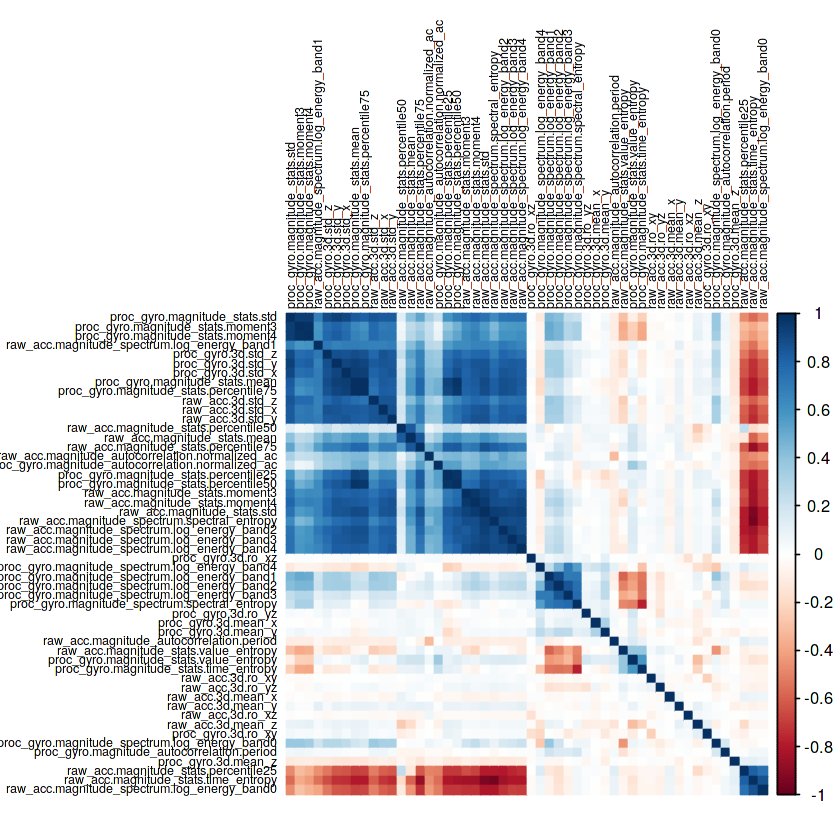

In [0]:
#Selection of sensor data
sensors <- select(data, matches("(^raw_acc|^proc_gyro|^raw_magnet|^watch_acceleration|^watch_heading|^location|^location_quick_features|^audio_naive|^audio_properties|^discrete|^lf_measurements)"))
nameSensor <- "empty"
typeSensor <- "Na"
for(i in 1:length(sensors)){
  if(nameSensor == unlist(strsplit(names(sensors[i]), ".", fixed = TRUE))[[1]]){
    next;
  } 
  
  nameSensor <- unlist(strsplit(names(sensors[i]), ".", fixed = TRUE))[[1]]
  cat(sprintf("%-40s %s\n",names(sensors[i]),typeof(sensors[[i]])))
}

sensors <- select(data, matches("(^proc_gyro|^raw_acc)"))
sensors[is.na(sensors)] <- 0
oc_cor <- cor(sensors)
oc_cor[is.na(oc_cor)]  <- 0
corrplot(oc_cor, method="color",type = "full", order = "hclust", tl.col = "black", tl.cex = 0.6 )

In [0]:
#Feature Elimination by Correlation
features <- select(data, -starts_with('label'))
features <- select(features, -starts_with('timestamp'))
colnum_features <- ncol(features)
###We remove the columns where the standard deviation is zero.
features<- Filter(var, features)
cat("We had a total of variables before eliminating: ",colnum_features, ". Now we have a total of: ",ncol(features))
remove = findCorrelation(cor(features), cutoff=0.9)
cat("The variables that could be removed are",colnames(features[remove]),"\n", "We have a total of variables to eliminate from: ",length(remove)," varibles.\n")
features <- select(features, -c(remove))
cat("We had a total of variables before eliminating: ",colnum_features,"Now we have a total of:",ncol(features)," variables.")

We had a total of variables before eliminating:  225 . Now we have a total of:  220The variables that could be removed are raw_acc.magnitude_stats.moment4 raw_acc.magnitude_spectrum.log_energy_band3 raw_acc.magnitude_spectrum.log_energy_band4 raw_acc.magnitude_spectrum.spectral_entropy proc_gyro.magnitude_stats.moment4 proc_gyro.magnitude_stats.percentile50 proc_gyro.magnitude_stats.percentile75 proc_gyro.3d.std_x proc_gyro.3d.std_y raw_magnet.magnitude_stats.percentile50 raw_magnet.magnitude_stats.percentile75 watch_acceleration.magnitude_stats.moment4 watch_acceleration.spectrum.z_log_energy_band2 watch_acceleration.relative_directions.avr_cosine_similarity_lag_range1 location.max_speed audio_naive.mfcc3.std audio_naive.mfcc4.std audio_naive.mfcc7.std audio_naive.mfcc8.std audio_naive.mfcc9.std audio_naive.mfcc10.std audio_naive.mfcc11.std audio_properties.normalization_multiplier discrete.app_state.missing discrete.battery_plugged.missing discrete.ringer_mode.missing discrete.wifi_s

Distribution of data from sensors
Skewness and kurtosis are analyzed for understanding the features that are not relevant. 


Skewness y kurtosis: 12.35846 / 363.0012 
Skewness y kurtosis: 4.385203 / 28.75842 
Skewness y kurtosis: -3.837943 / 23.13562 
Skewness y kurtosis: 7.682582 / 184.2166 
Skewness y kurtosis: 7.143126 / 96.681 
Skewness y kurtosis: -1.061239 / 0.1836409 
Skewness y kurtosis: -6.549311 / 54.57246 
Skewness y kurtosis: -3.727529 / 112.8026 
Skewness y kurtosis: 5.58964 / 40.30845 
Skewness y kurtosis: 3.224098 / 9.90115 


[1] "However, if we have a positive skewness greater than zero, the tail of the distribution points to the right. The kurtosis will tell us how weeping the data is, that is, if it is positive and the higher the value of the kurtosis the more weights are the data. For example, we can see this situation in the variable raw_acc.magnitude_stats.moment3 Plotting we will see it. It is not enough to see these few,\nbut still we will have to normalize due to the specifications of the machine learning algorithms"

Warning message:
“Use of `features$raw_acc.magnitude_stats.moment3` is discouraged. Use `raw_acc.magnitude_stats.moment3` instead.”
Warning message:
“Use of `features$raw_acc.magnitude_stats.moment3` is discouraged. Use `raw_acc.magnitude_stats.moment3` instead.”
Warning message:
“Use of `features$raw_acc.magnitude_stats.moment3` is discouraged. Use `raw_acc.magnitude_stats.moment3` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



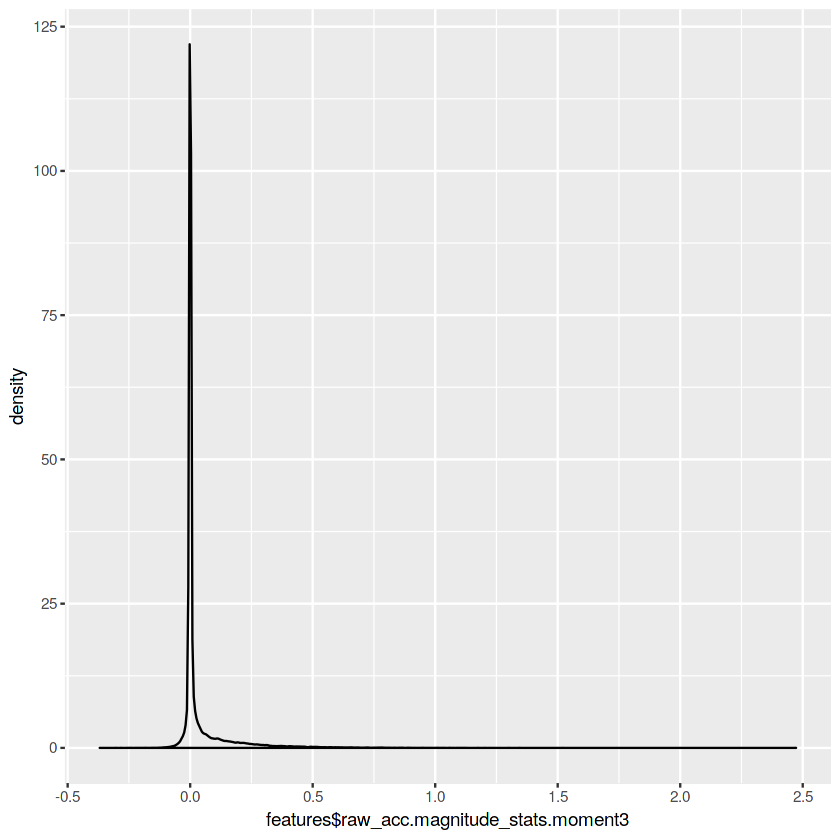

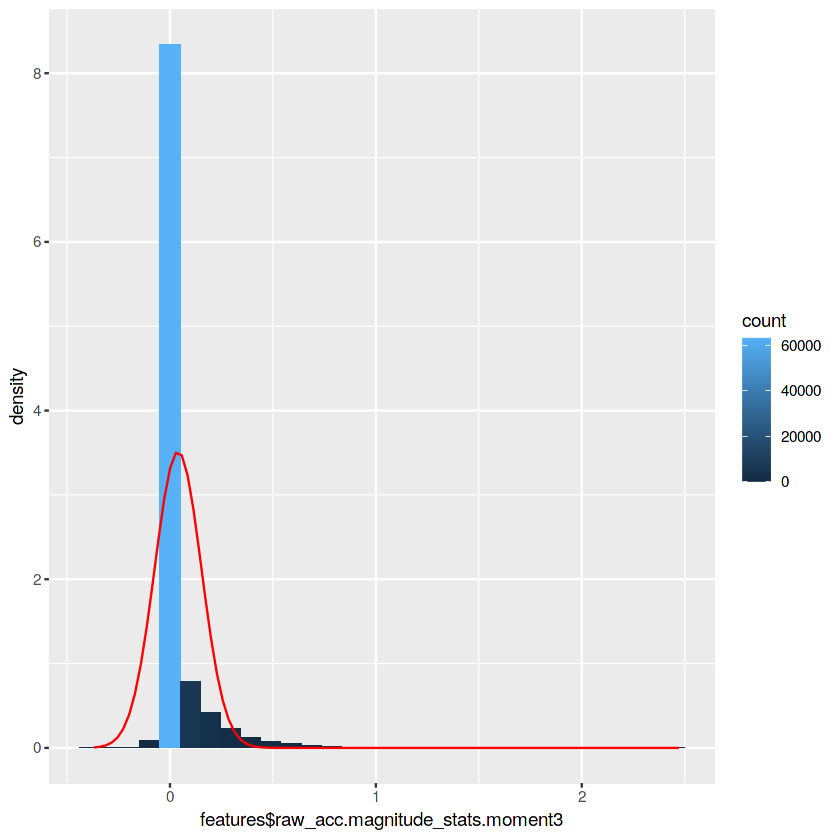

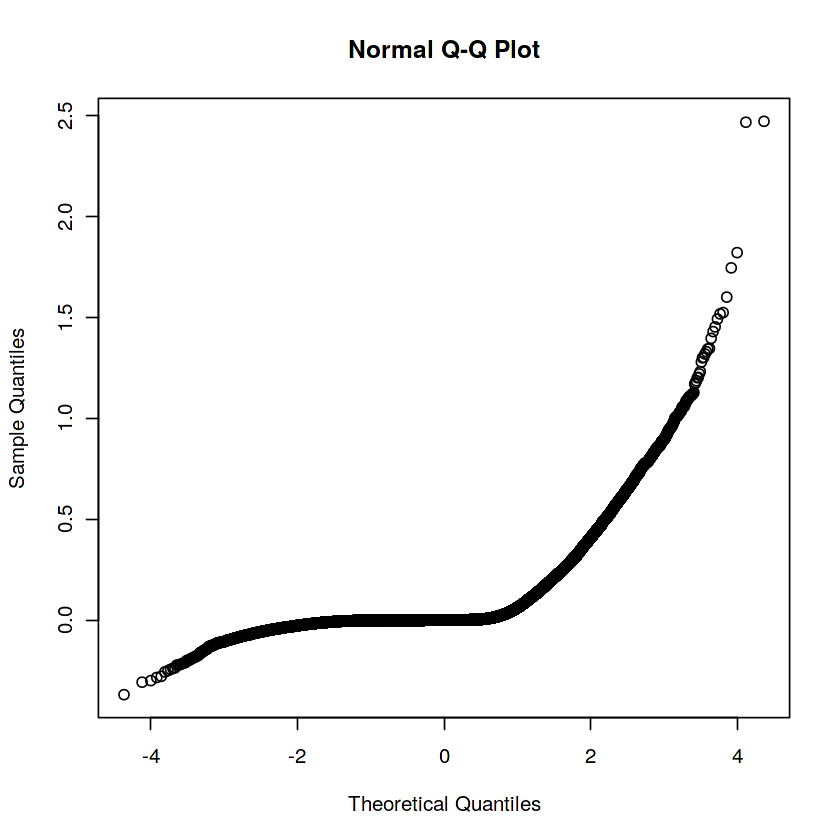

In [0]:
for(i in 1:10){
  cat("Skewness y kurtosis:",skewness(features[,i]),"/",kurtosis(features[,i]),colnames(features[,i]),"\n")
  
}

#If the skewness is zero it means that the data follows a normal distribution.
"However, if we have a positive skewness greater than zero, the tail of the distribution points to the right. The kurtosis will tell us how weeping the data is, that is, if it is positive and the higher the value of the kurtosis the more weights are the data. For example, we can see this situation in the variable raw_acc.magnitude_stats.moment3 Plotting we will see it. It is not enough to see these few,
but still we will have to normalize due to the specifications of the machine learning algorithms"

ggplot(features, aes(x=features$raw_acc.magnitude_stats.moment3)) + geom_density()
ggplot(features, aes(x=features$raw_acc.magnitude_stats.moment3)) + geom_histogram(aes(y=..density.., fill=..count..)) + stat_function(fun=dnorm,color="red",args=list(mean=mean(features$raw_acc.magnitude_stats.moment3),sd=sd(features$raw_acc.magnitude_stats.moment3)))
qqnorm(features$raw_acc.magnitude_stats.moment3)

"Our data does not follow a normal distribution. Therefore, the data needs to be transformed, in this case scaled to be able to normalize them. Why? Because we have to put them on a common scale, since this will improve the understanding of their distribution and be able to compare them more easily avoiding the distortion of scale difference as well as the fact that in this way problems with the algorithms are avoided of adjustment of models that do not possess the property of invariance to scaling, for example, algorithms based on descent gradient (such as neural networks that use backpropagation).

#Subjects

###The ExtraSensory dataset contains data from 60 users (34 subjects were female and 26 were male). The users would use their own phone, and possibly additional convenient devices, like watches (56 out of the 60 agreed to wear the watch). For the purpose of large-scale data collection the creators of extrasensory developed a mobile application for both iphone and android and for smartwatch (Pebble). The app was used to collect both sensor measurement and context labels. Every minute the app records a 20sec window of sensor measurements from the phone and watch.

#We can see the different context labels and the time that we have."


In [0]:
labels <- select(data, starts_with('label'))
timeLabel <- select(labels, -label_source)
timeLabel <- apply(timeLabel,2,function(x){sum(as.numeric(x), na.rm = TRUE)})
timeLabel <- sort(timeLabel, decreasing = TRUE)

In [0]:
for (i in 1:length(timeLabel)){
  cat(sprintf("%-40s %d minutes \n",names(timeLabel[i]),unname(timeLabel[i])))
  
}

label.OR_indoors                         73173 minutes 
label.LOC_home                           33397 minutes 
label.PHONE_ON_TABLE                     29069 minutes 
label.SITTING                            28060 minutes 
label.LYING_DOWN                         22317 minutes 
label.SLEEPING                           18758 minutes 
label.TALKING                            12106 minutes 
label.OR_standing                        9134 minutes 
label.AT_SCHOOL                          8914 minutes 
label.LOC_main_workplace                 8035 minutes 
label.WITH_FRIENDS                       7928 minutes 
label.PHONE_IN_POCKET                    7866 minutes 
label.COMPUTER_WORK                      5966 minutes 
label.FIX_walking                        5595 minutes 
label.PHONE_IN_HAND                      4610 minutes 
label.OR_outside                         4272 minutes 
label.SURFING_THE_INTERNET               3951 minutes 
label.EATING                             3150 minutes 
lab

### We can see the test times we have in our whole set.

## Report types

"The users could report of two types:
  
1. Main activity. Labels describing movement or posture of the user.
2. Secondary activity. Labels describing more specific context in different aspects: sports (e.g. playing basketball, at the gym), transportation (e.g. drive - I'm the driver, on the bus), basic needs (e.g. sleeping, eating, toilet), company (e.g. with family, with co-workers), location (e.g. at home, at work, outside) etc.
Multiple secondary labels can be applied to an example.

## Try search patterns and relationships

In this picture we can see on the X axis we have the hours and on the Y axis we have the context labels. In this way it is already possible to see routines and patterns, For example, on May 25 and 26."


#### We can intuit from the images that there is a relationship between 00:00 and 08:00 with the context labels: #sleeping and lying down. But it's hard to appreciate with all the individuals together.

#### We can intuit from the images that there is a relationship between 00:00 and 08:00 with the context labels: sleeping and lying down. But it's hard to appreciate with all the individuals together.

#### Correlation matrix between the context labels

#### With the correlation matrix it is easier to see the correlations between the labels.


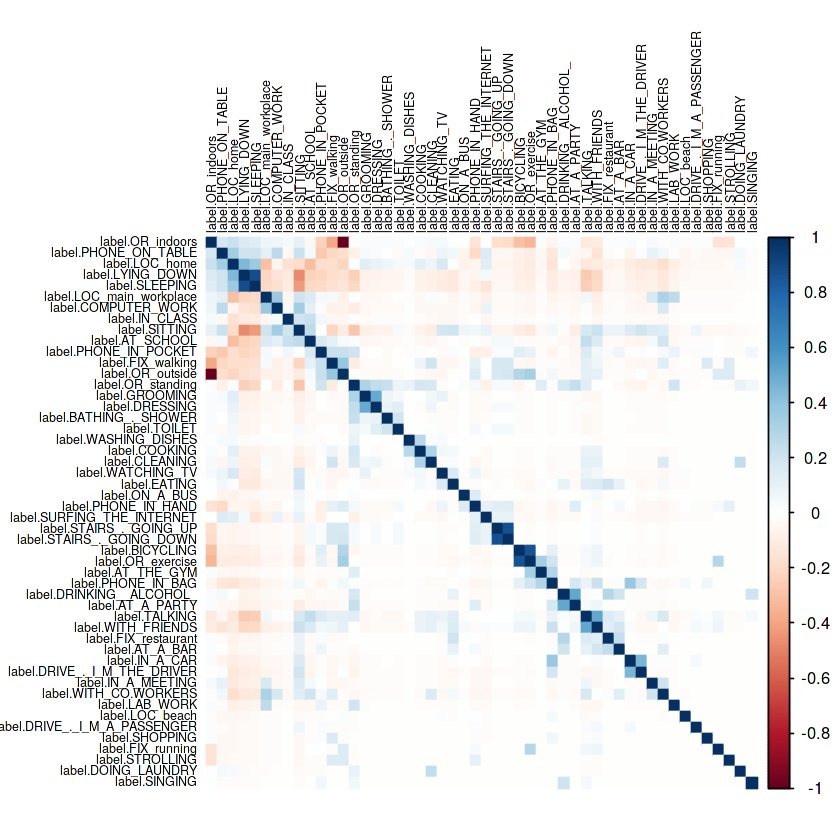

In [0]:
oc <- select(data, starts_with('label'))
oc <- select(oc, -starts_with('label_source'))
oc[is.na(oc)] <- 0
oc <- oc[, colSums(oc) > 1]
oc_cor <- cor(oc)
oc_cor[is.na(oc_cor)]  <- 0
corrplot(oc_cor, method="color",type = "full", order = "hclust", tl.col = "black", tl.cex = 0.6 )


#### I have also used the hierarchical clustering technique using the agglomerative method (AGNES). Clustering is a technique to group similar data points in a group and separate the different observations into different groups.  In Hierarchical Clustering, clusters are created so that they have a predetermined. 

#### We can see groupings that we have detected before visualizing the data.


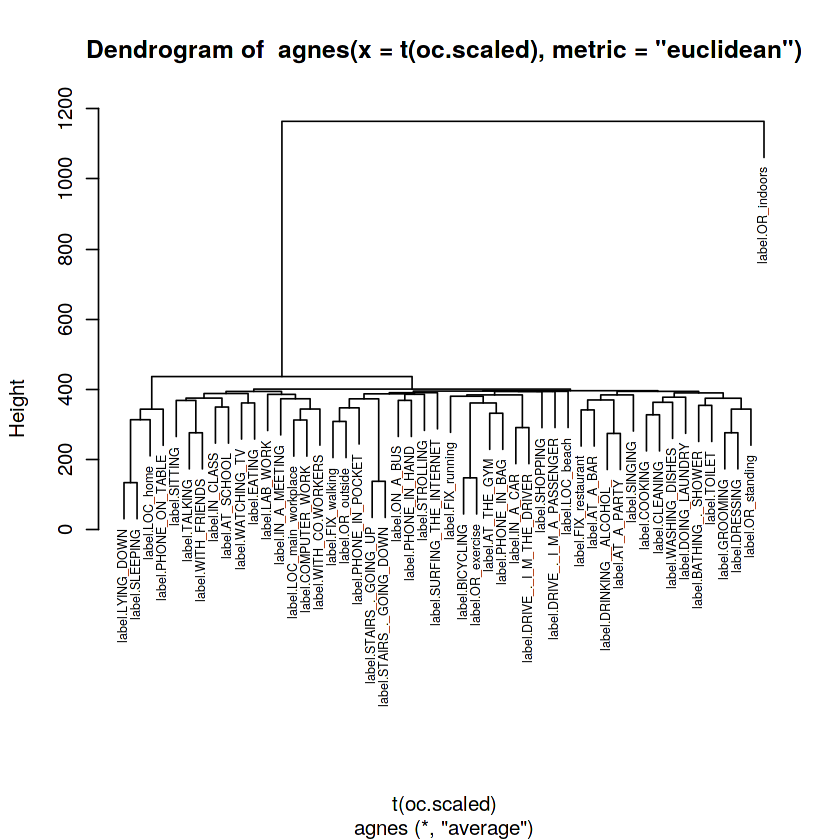

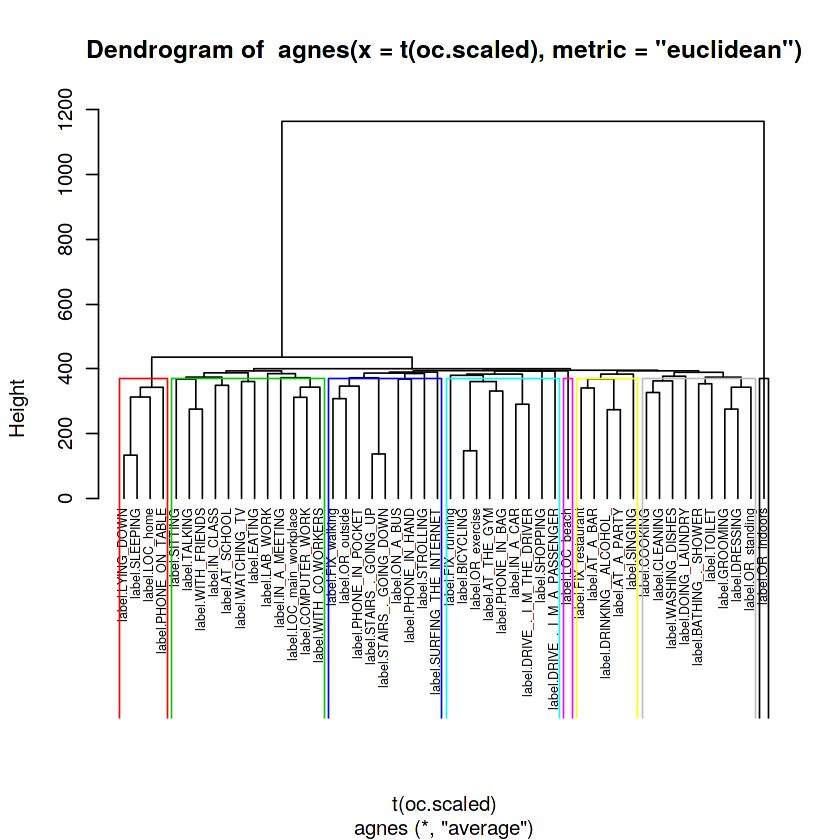

In [0]:
set.seed(123)
oc <- select(data, starts_with('label'))
oc <- select(oc, -starts_with('label_source'))
oc[is.na(oc)] <- 0
oc <- oc[, colSums(oc) > 1]
#oc <- t(oc)
oc.pre <- preProcess(oc,method="scale")
oc.scaled <- predict(oc.pre, oc)
oc.diana <- agnes(t(oc.scaled), metric="euclidean")
pltree(oc.diana,cex=.6)

# Here I set K equal to 8, to point out the clusters (It's a random value)

set.seed(123)
oc <- select(data, starts_with('label'))
oc <- select(oc, -starts_with('label_source'))
oc[is.na(oc)] <- 0
oc <- oc[, colSums(oc) > 1] #I avoid columns without more than one example
#oc <- t(oc)
oc.pre <- preProcess(oc,method="scale")
oc.scaled <- predict(oc.pre, oc)
oc.agnes <- agnes(t(oc.scaled), metric="euclidean")
pltree(oc.agnes, hang=-1, cex = 0.6)

##Ref: http://www.sthda.com/english/wiki/beautiful-dendrogram-visualizations-in-r-5-must-known-methods-unsupervised-machine-learning
rect.hclust(oc.agnes, k = 8, border = 2:10)

# Now we can visualize some groups that we have found using clustering techniques or fixing ourselves in the correlation matrix, since they make sense. For example, when you are at home lying down you are sleeping.


In [0]:
# Table subjects examples


record_table <- data_individual %>% group_by(idUser) %>% summarise(LYING_DOWN = sum(label.LYING_DOWN, na.rm = TRUE), SITTING= sum(label.SITTING, na.rm = TRUE), FIX_walking= sum(label.FIX_walking, na.rm = TRUE), FIX_running= sum(label.FIX_running, na.rm = TRUE), BICYCLING= sum(label.BICYCLING, na.rm = TRUE), PHONE_ON_TABLE= sum(label.PHONE_ON_TABLE, na.rm = TRUE))
record_table <- arrange(record_table, record_table$LYING_DOWN, record_table$SITTING, record_table$FIX_walking, record_table$FIX_running, record_table$BICYCLING)

record_table



idUser,LYING_DOWN,SITTING,FIX_walking,FIX_running,BICYCLING,PHONE_ON_TABLE
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24E40C4C-A349-4F9F-93AB-01D00FB994AF,102,1728,363,0,59,1137
00EABED2-271D-49D8-B599-1D4A09240601,657,1106,163,0,0,1594
27E04243-B138-4F40-A164-F40B60165CF3,1115,1184,207,0,0,1137
4E98F91F-4654-42EF-B908-A3389443F2E7,1137,816,16,0,0,631
0A986513-7828-4D53-AA1F-E02D6DF9561B,1145,2253,190,7,0,553
5EF64122-B513-46AE-BCF1-E62AAC285D2C,1284,1312,132,0,0,2668
1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,1799,3441,925,47,0,4082
33A85C34-CFE4-4732-9E73-0A7AC861B27A,1810,1810,454,0,150,2286
0E6184E1-90C0-48EE-B25A-F1ECB7B9714E,1989,3089,1532,0,0,107


Here we have the subject with your examples. We can think in remove some subject that have few examples and can introduce some noise, but we can only know if we will study it more in depth.

Before moving on to our ML algorithms, we will save all our plots as .png images for reference and analytical purposes.

Reference: https://stackoverflow.com/questions/35321775/save-all-plots-already-present-in-the-panel-of-rstudio/53809715

In [0]:
#Due to a non-existant set of activities in running and bicycling, we chose only 3 relevant ones
record_table <- data_individual %>% group_by(idUser) %>% 
summarise(SITTING= sum(label.SITTING, na.rm = TRUE), 
FIX_walking= sum(label.FIX_walking, na.rm = TRUE),
LYING_DOWN= sum(label.LYING_DOWN, na.rm = TRUE))


record_table <- arrange(record_table, record_table$SITTING, record_table$FIX_walking, record_table$LYING_DOWN)

In [0]:
record_table

idUser,SITTING,FIX_walking,LYING_DOWN
<fct>,<dbl>,<dbl>,<dbl>
4E98F91F-4654-42EF-B908-A3389443F2E7,816,16,1137
4FC32141-E888-4BFF-8804-12559A491D8C,1004,298,2096
00EABED2-271D-49D8-B599-1D4A09240601,1106,163,657
27E04243-B138-4F40-A164-F40B60165CF3,1184,207,1115
5EF64122-B513-46AE-BCF1-E62AAC285D2C,1312,132,1284
11B5EC4D-4133-4289-B475-4E737182A406,1694,164,2946
24E40C4C-A349-4F9F-93AB-01D00FB994AF,1728,363,102
33A85C34-CFE4-4732-9E73-0A7AC861B27A,1810,454,1810
0A986513-7828-4D53-AA1F-E02D6DF9561B,2253,190,1145


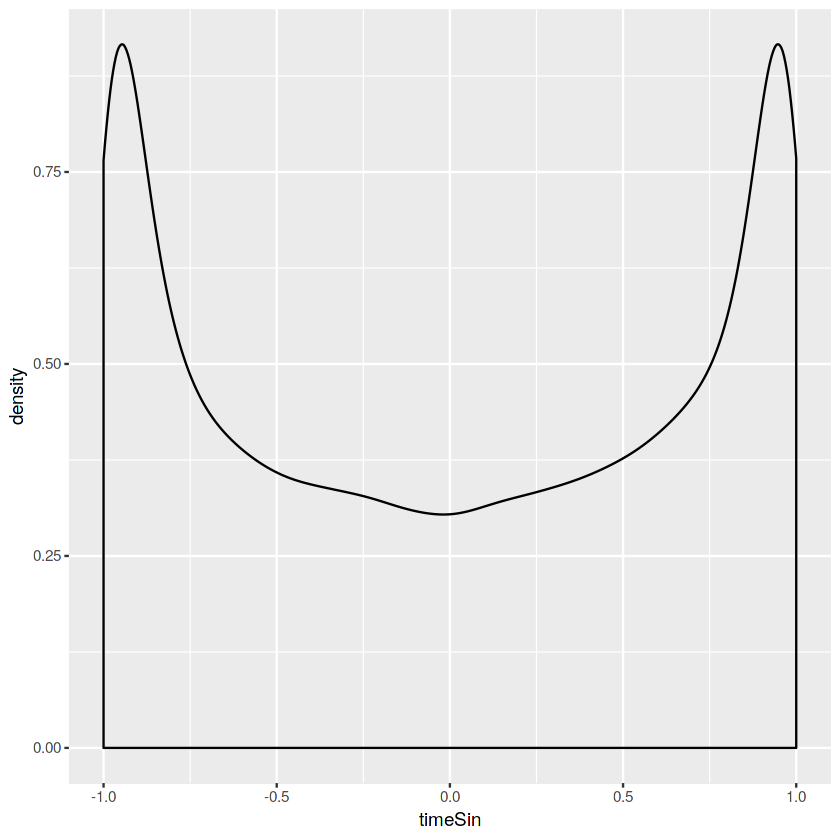

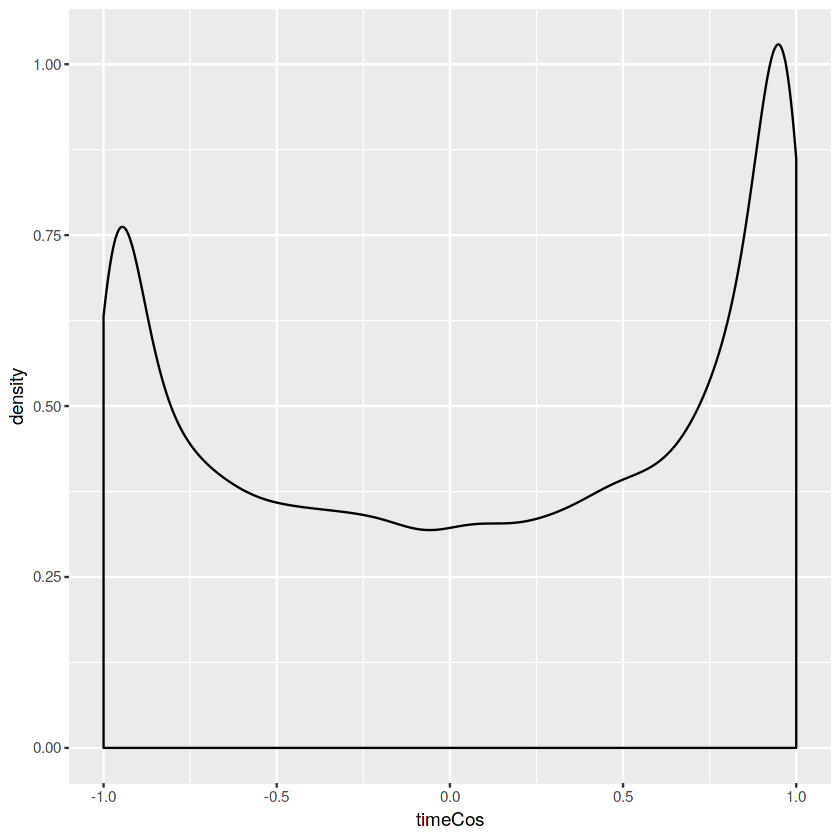

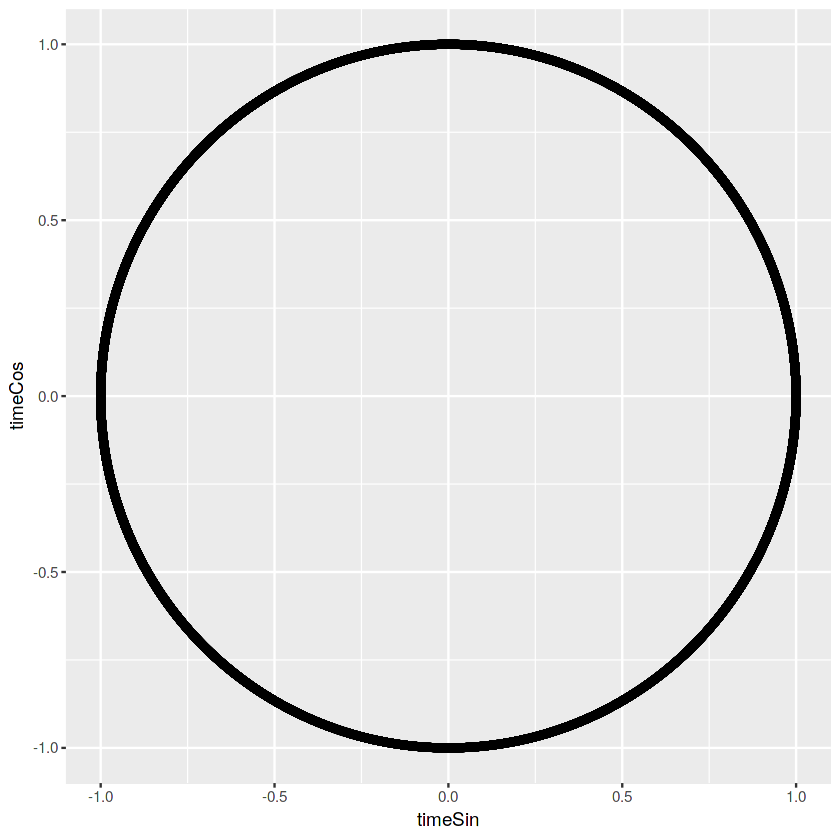

In [0]:
set.seed(123)
seconds_in_day = 24*60*60
time1 <- as.data.frame(sin(2*pi*data["timestamp"]/seconds_in_day))
time2 <- as.data.frame(cos(2*pi*data["timestamp"]/seconds_in_day))
colnames(time1) <- "timeSin"
colnames(time2) <- "timeCos"
cyclic_time <- cbind(time1, time2)
data<-cbind(cyclic_time, data)
ggplot(data, aes(timeSin))+geom_density()
ggplot(data, aes(timeCos))+geom_density()
ggplot(data, aes(timeSin, timeCos))+geom_point()
hours <- anytime(data$timestamp, tz="PST8PDT")
hours <- format(as.POSIXct(hours, "%Y-%m-%d %H:%M:%S", tz = ""), format = "%Y-%m-%d %H:%M")
hours <- format(as.POSIXct(hours, "%Y-%m-%d %H:%M", tz = ""), format = "%H")

set.seed(123)
timeSin <- select(data, starts_with('timeSin'))
timeCos <- select(data, starts_with('timeCos'))
labels <- select(labels, -starts_with("label_source"))

In [0]:
#Recoding the output


## Looking at the labels with the number of minutes/examples spend by all the users 

labels <- data

labels <- select(data, (c('label.SITTING', 'label.FIX_walking', 'label.LYING_DOWN')))
z <- 1
code.exit <- c()


for(i in 1:nrow(labels)){
  next_tag <- 0
  for(j in 1:ncol(labels)){
    if (labels[i,j] == 1){
      if(next_tag == 1){
        code.exit[z] <- paste(code.exit[z] , colnames(labels[j]), sep='+');
      }
      else{
        code.exit[z] <-colnames(labels[j]);
      }
      
      next_tag <- 1
      
    }
    
    
  }
  if(next_tag == 0) code.exit[z] <- "Other activity"
  z<-z+1;
}

In [0]:
#We already have a part of the features ready.
#the NA labels as zeros
for(i in 1:ncol(labels)){
labels[is.na(labels[,i]), i] <- 0
}
data_all <- cbind(features, code.exit)
data_all <- cbind(timeSin, data_all)
data_all <- cbind(timeCos, data_all)

table(data_all$code.exit)
EStageData <- data_all
#write.csv(EStageData,"D://Thesis//EDA//data_all.csv", row.names = FALSE)
#EStageData <- data_all
#write.csv(EStageData,"D://Thesis//EDA//data_all.csv", row.names = FALSE)
#write.csv(EStageData,"D://Thesis//EDA//data1_all.csv", row.names = FALSE)
preProcMod<-preProcess(data_all[colnames(features)],method=c("center","scale"))
data_all.Transf<-predict(preProcMod,data_all)
Vars_Entry <- colnames(select(data_all.Transf, -starts_with('code.exit')))


label.FIX_walking  label.LYING_DOWN     label.SITTING    Other activity 
             5595             22317             28060             21473 

### Recoding the output
set.seed(123)
data <- data_all
data_all.rf <- randomForest(code.exit ~ ., data=data_all, ntree=1000, keep.forest=FALSE,
                          importance=TRUE)

varImpPlot(data_all.rf)**

In [0]:
preProcMod<-preProcess(data_all[colnames(features)],method=c("center","scale"))
# Comment
data_all.Transf<-predict(preProcMod,data_all)
Vars_Enter <- colnames(select(data_all.Transf, -starts_with('code.exit')))

In [0]:
library(caret)
set.seed(123)
train.index <- createDataPartition(data_all.Transf$code.exit, p = .7, list = FALSE)
train <- data_all.Transf[ train.index,]
test  <- data_all.Transf[-train.index,]
#dfte<-data_all.Transf[1:10000,]
#randomForest <- randomForest( x= data_all.Transf[Vars_Enter], y = as.factor(data_all.Transf$code.exit),n_tree=3)
rf <- randomForest(x=train[1:178],y=as.factor(train[,179]))
cat("Random forest information: ")
print(rf)
saveRDS(rf, "rf.rds")

ypred<-predict(rf,test[1:178])

tstab<-table(test[,179],ypred)

confusionMatrix(tstab)

Random forest information: 
Call:
 randomForest(x = train[1:178], y = as.factor(train[, 179])) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 13

        OOB estimate of  error rate: 10.6%
Confusion matrix:
                  label.FIX_walking label.LYING_DOWN label.SITTING
label.FIX_walking              2427                6           680
label.LYING_DOWN                  4            14997           360
label.SITTING                   236               57         18225
Other activity                  356              154          1704
                  Other activity class.error
label.FIX_walking            804  0.38039316
label.LYING_DOWN             261  0.04000768
label.SITTING               1124  0.07214133
Other activity             12818  0.14728579


Confusion Matrix and Statistics

                   ypred
                    label.FIX_walking label.LYING_DOWN label.SITTING
  label.FIX_walking              1053                1           324
  label.LYING_DOWN                  0             6398           162
  label.SITTING                   117               25          7753
  Other activity                  158               55           717
                   ypred
                    Other activity
  label.FIX_walking            300
  label.LYING_DOWN             135
  label.SITTING                523
  Other activity              5511

Overall Statistics
                                          
               Accuracy : 0.8917          
                 95% CI : (0.8876, 0.8956)
    No Information Rate : 0.3855          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8449          
                                          
 Mcnemar's Test P-Value : < 2.2e-

In [0]:
#install.packages("xgboost")

library(xgboost)

# Create numeric labels with one-hot encoding

train_labs <- as.numeric(train$code.exit) - 1
test_labs <- as.numeric(test$code.exit) - 1

new_train <- model.matrix(~ . + 0, data = train[, 1:178])
new_test <- model.matrix(~ . + 0, data = test[, 1:178])

# Prepare matrices
xgb_train <- xgb.DMatrix(data = new_train, label = train_labs)
xgb_test <- xgb.DMatrix(data = new_test, label = test_labs)

# Set parameters(default)
params <- list(booster = "gbtree", objective = "multi:softprob", num_class = 6, eval_metric = "mlogloss")

# Calculate # of folds for cross-validation
xgbcv <- xgb.cv(params = params, data = xgb_test, nrounds = 50, nfold = 5, showsd = TRUE, stratified = FALSE, print_every_n = 10, early_stop_round = 20, maximize = FALSE, prediction = TRUE)



[1]	train-mlogloss:1.330030+0.002568	test-mlogloss:1.351492+0.001757 
[11]	train-mlogloss:0.437526+0.001801	test-mlogloss:0.534773+0.005184 
[21]	train-mlogloss:0.293482+0.002696	test-mlogloss:0.429947+0.005582 
[31]	train-mlogloss:0.231092+0.003030	test-mlogloss:0.394327+0.006342 
[41]	train-mlogloss:0.189154+0.002729	test-mlogloss:0.375927+0.006205 
[50]	train-mlogloss:0.162124+0.001953	test-mlogloss:0.365084+0.005592 


In [0]:
OOF_prediction <- data.frame(xgbcv$pred) %>%
  mutate(max_prob = max.col(., ties.method = "last"),
         label = test_labs + 1)
confusionMatrix(factor(OOF_prediction$max_prob),
                factor(OOF_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3    4
         1 1008    0  140  216
         2    3 6403   48  158
         3  353  166 7541  925
         4  314  126  689 5142

Overall Statistics
                                          
               Accuracy : 0.8649          
                 95% CI : (0.8605, 0.8693)
    No Information Rate : 0.3623          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8067          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity           0.60072   0.9564   0.8958   0.7983
Specificity           0.98348   0.9874   0.9025   0.9328
Pos Pred Value        0.73900   0.9684   0.8393   0.8200
Neg Pred Value        0.96936   0.9824   0.9384   0.9234
Precision             0.73900   0.9684   0.8393   0.8200
Recall              

In [0]:
xgbcv <- xgb.cv(params = params, data = xgb_test, nrounds = 100, nfold = 5, showsd = TRUE, stratified = FALSE, print_every_n = 10, early_stop_round = 20, maximize = FALSE, prediction = TRUE)

[1]	train-mlogloss:1.329905+0.001589	test-mlogloss:1.350751+0.004657 
[11]	train-mlogloss:0.434845+0.002896	test-mlogloss:0.534630+0.005541 
[21]	train-mlogloss:0.291580+0.003211	test-mlogloss:0.429271+0.006840 
[31]	train-mlogloss:0.230082+0.002886	test-mlogloss:0.394438+0.006974 
[41]	train-mlogloss:0.190174+0.003652	test-mlogloss:0.377089+0.006392 
[51]	train-mlogloss:0.158859+0.003166	test-mlogloss:0.364552+0.005662 
[61]	train-mlogloss:0.134915+0.003390	test-mlogloss:0.355606+0.005589 
[71]	train-mlogloss:0.113608+0.003571	test-mlogloss:0.348399+0.006413 
[81]	train-mlogloss:0.096195+0.002951	test-mlogloss:0.342506+0.006620 
[91]	train-mlogloss:0.082104+0.002567	test-mlogloss:0.339139+0.007712 
[100]	train-mlogloss:0.069819+0.001824	test-mlogloss:0.335209+0.007730 


In [0]:
OOF_prediction <- data.frame(xgbcv$pred) %>%
  mutate(max_prob = max.col(., ties.method = "last"),
         label = test_labs + 1)
confusionMatrix(factor(OOF_prediction$max_prob),
                factor(OOF_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3    4
         1 1024    3  136  197
         2    5 6433   42  108
         3  321  142 7630  818
         4  328  117  610 5318

Overall Statistics
                                         
               Accuracy : 0.8783         
                 95% CI : (0.874, 0.8825)
    No Information Rate : 0.3623         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8259         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity           0.61025   0.9609   0.9064   0.8256
Specificity           0.98441   0.9906   0.9135   0.9372
Pos Pred Value        0.75294   0.9765   0.8562   0.8345
Neg Pred Value        0.97010   0.9843   0.9450   0.9334
Precision             0.75294   0.9765   0.8562   0.8345
Recall                0.61025

In [0]:
xgbcv <- xgb.cv(params = params, data = xgb_test, nrounds = 100, nfold = 10, showsd = TRUE, stratified = FALSE, print_every_n = 10, early_stop_round = 20, maximize = FALSE, prediction = TRUE)

[1]	train-mlogloss:1.331960+0.002836	test-mlogloss:1.349857+0.006564 
[11]	train-mlogloss:0.443196+0.003311	test-mlogloss:0.529811+0.012661 
[21]	train-mlogloss:0.300672+0.003589	test-mlogloss:0.422222+0.012977 
[31]	train-mlogloss:0.237005+0.002322	test-mlogloss:0.384805+0.013967 
[41]	train-mlogloss:0.196355+0.004351	test-mlogloss:0.364865+0.013618 
[51]	train-mlogloss:0.166483+0.004131	test-mlogloss:0.352592+0.014146 
[61]	train-mlogloss:0.141599+0.003818	test-mlogloss:0.342971+0.014868 
[71]	train-mlogloss:0.121550+0.003256	test-mlogloss:0.335784+0.015082 
[81]	train-mlogloss:0.104119+0.002311	test-mlogloss:0.329542+0.015576 
[91]	train-mlogloss:0.088902+0.002166	test-mlogloss:0.323822+0.016369 
[100]	train-mlogloss:0.077179+0.002167	test-mlogloss:0.320279+0.016411 


In [0]:
xgbcv <- xgb.cv(params = params, data = xgb_test, nrounds = 100, nfold = 10, showsd = TRUE, stratified = FALSE, print_every_n = 10, early_stop_round = 30, maximize = FALSE, prediction = TRUE)

[1]	train-mlogloss:1.332463+0.002013	test-mlogloss:1.350896+0.006826 
[11]	train-mlogloss:0.442735+0.003924	test-mlogloss:0.532956+0.013112 
[21]	train-mlogloss:0.299591+0.003536	test-mlogloss:0.424950+0.012804 
[31]	train-mlogloss:0.237713+0.003464	test-mlogloss:0.388406+0.012155 
[41]	train-mlogloss:0.196990+0.004240	test-mlogloss:0.368598+0.012539 
[51]	train-mlogloss:0.167076+0.003619	test-mlogloss:0.356318+0.012901 
[61]	train-mlogloss:0.141734+0.002695	test-mlogloss:0.346573+0.012733 
[71]	train-mlogloss:0.121297+0.002265	test-mlogloss:0.338575+0.012569 
[81]	train-mlogloss:0.104040+0.002435	test-mlogloss:0.332540+0.013518 
[91]	train-mlogloss:0.088889+0.002172	test-mlogloss:0.328352+0.014225 
[100]	train-mlogloss:0.077290+0.002012	test-mlogloss:0.323931+0.014267 


In [0]:
OOF_prediction <- data.frame(xgbcv$pred) %>%
  mutate(max_prob = max.col(., ties.method = "last"),
         label = test_labs + 1)
confusionMatrix(factor(OOF_prediction$max_prob),
                factor(OOF_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3    4
         1 1035    2  119  184
         2    3 6449   34  104
         3  324  124 7704  811
         4  316  120  561 5342

Overall Statistics
                                          
               Accuracy : 0.8837          
                 95% CI : (0.8795, 0.8878)
    No Information Rate : 0.3623          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8335          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity           0.61681   0.9633   0.9152   0.8294
Specificity           0.98585   0.9915   0.9150   0.9406
Pos Pred Value        0.77239   0.9786   0.8595   0.8427
Neg Pred Value        0.97063   0.9852   0.9500   0.9349
Precision             0.77239   0.9786   0.8595   0.8427
Recall              

In [0]:
OOF_prediction <- data.frame(xgbcv$pred) %>%
  mutate(max_prob = max.col(., ties.method = "last"),
         label = test_labs + 1)
confusionMatrix(factor(OOF_prediction$max_prob),
                factor(OOF_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3    4
         1 1053    2  120  179
         2    2 6443   36  112
         3  321  138 7671  825
         4  302  112  591 5325

Overall Statistics
                                          
               Accuracy : 0.8821          
                 95% CI : (0.8778, 0.8862)
    No Information Rate : 0.3623          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8312          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity           0.62753   0.9624   0.9113   0.8267
Specificity           0.98604   0.9909   0.9133   0.9401
Pos Pred Value        0.77770   0.9772   0.8566   0.8412
Neg Pred Value        0.97143   0.9849   0.9477   0.9340
Precision             0.77770   0.9772   0.8566   0.8412
Recall              

# save the model to disk
saveRDS(xgbcv, "D:/Thesis/plots/XGBoost_final.rds")

model = keras_model_sequential()
model %>%
layer_dense(units = 80, activation = layer_activation_leaky_relu(), input_shape = (178)) %>%
layer_dense(units = 4, activation = 'softmax')
summary(model)
model %>% compile(
loss = 'sparse_categorical_crossentropy',
optimizer = optimizer_adam(),
metrics = c('accuracy'))

library(caret)
set.seed(123)
train.index <- createDataPartition(DF$code.exit, p = .7, list = FALSE)
train <- DF[ train.index,]
test  <- DF[-train.index,]

train_labs <- as.numeric(train$code.exit) - 1
test_labs <- as.numeric(test$code.exit) - 1

library(keras)
model = keras_model_sequential()
model %>%
layer_dense(units = 64, activation = layer_activation_leaky_relu(), input_shape = (178)) %>%
layer_dense(units = 32, activation = layer_activation_leaky_relu())
layer_dense(units = 4, activation = 'softmax')
summary(model)
model %>% compile(
loss = 'sparse_categorical_crossentropy',
optimizer = optimizer_adam(),
metrics = c('accuracy'))

In [0]:
model = keras_model_sequential()
model %>%
layer_dense(units = 128, activation = layer_activation_leaky_relu(), input_shape = (178)) %>%
layer_dropout(rate=0.2) %>%
layer_dense(units = 256)  %>%
layer_dropout(rate=0.2) %>%
layer_dense(units = 4, activation = 'softmax')
summary(model)
model %>% compile(
loss = 'sparse_categorical_crossentropy',
optimizer = optimizer_adam(),
metrics = c('accuracy'))
#'sparse_categorical_crossentropy'

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 128)                     22912       
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_4 (Dense)                     (None, 256)                     33024       
________________________________________________________________________________
dropout_3 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_5 (Dense)                     (None, 4)                       1028        
Total params: 56,964
Trainable params: 56,964
Non-trainable params: 0
_________________

In [0]:
history = model %>% fit(
as.matrix(test[,1:178]), 
as.matrix(test_labs),
epochs = 3000,
batch_size = 128,
validation_split = 0.2
)

In [0]:
history

In [0]:
history1<-table(history,ypred)
tstab
confusionMatrix(tstab)

In [0]:

#plot(history)
cat("The final training and evaluation errors are", history$metrics$loss[100],"y",
history$metrics$val_loss[100],"\n")

In [0]:

vymax = max(c(history$metrics$loss,history$metrics$val_loss))
plot(history$metrics$loss,main="Training/Validation errors for Extrasensory",col="blue",
     type="l",xlab="Epochs",ylab="Loss",ylim=c(0,vymax))
lines(history$metrics$val_loss,col="red")

In [0]:
model %>% evaluate(as.matrix(test[,1:178]), as.matrix(test_labs), batch_size = 128)

In [0]:
library(ramify)
ypred<-model%>%predict(as.matrix(test[,1:178]))
ypred<-argmax(ypred)
ypred<-ypred-1
table(ypred)
#outputs    <- sapply(inputs, mp)
#best.input <- inputs[which.max(outputs)]

In [0]:
tstab<-table(test_labs,ypred)
tstab
confusionMatrix(tstab)

In [0]:
ypred


In [0]:
history
#head(DF[,180])

In [0]:
getwd()

In [0]:
saveRDS(history, "MLP1.rds")

In [0]:
history

In [0]:
OOF_prediction3 <- data.frame(xgbcv3$pred) %>%
  mutate(max_prob = max.col(., ties.method = "last"),
         label = test_labs + 1)
confusionMatrix(factor(OOF_prediction2$max_prob),
                factor(OOF_prediction2$label),
                mode = "everything")